[<- Anterior](k_means.ipynb) | [Próximo ->](../../Metricas/silhouette_score.ipynb)

# BDSCAN

O modelo de DBSCAM é um modelo de aprendizado não supervisionado que agrupa pontos de dados baseado em regiões de densidade, isso é, considera que um cluster é formado por uma região em que existe uma grande quantidade de pontos dentro de uma distancia definida.

Nesse modelo, pontos que não estão proximos o suficiente de um grupo de pontos são marcados como ruídos ao invés de serem classificados como parte de um grupo proximo. Além disso, o DBSCAN pode encontrar clusters de formatos arbitrarios e não requer uma quantidade prévia de clusters. 

**O que será abordado**
- Imports
- Dados de teste
- Criação do Modelo
- Treinamento do Modelo
- Visualização dos clusters

# Imports

In [1]:
# Import da biblioteca matplotlib -> Usada para demonstrar o método do cotovelo e os clusters obtidos pelo modelo
import matplotlib.pyplot as plt

# Import do dataset padrão para identificação de espécies de flores
from sklearn.datasets import load_iris

# Import da Classe DBSCAM -> Utilizada para criar o modelo DBSCAM
from sklearn.cluster import DBSCAN

# Dados de teste

Nessa seção será apresentado o dataset utilizado para desenvolver o modelo de Gaussian Nayve Bayes que será criado nesse documento. Isso será feito através da criação de um dataframe Pandas que recebe um dataset padrão do scikit-learn.

In [2]:
# Obtém os dados do dataset na forma de um dataset
data = load_iris(as_frame=True).frame
data = data[['petal length (cm)', 'petal width (cm)']]
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Explicação dos dados:    

O dataset final possui 2 colunas de Features que representam caracteristicas de um conjunto de plantas. Essas caracteristicas são:

- petal length (cm): Comprimento da Pétala medido em centimentros
- petal width (cm): Largura da Pétala medida em centimetros

# Criação do Modelo

Para criar um modelo de DBCAN utilizando a biblioteca scikit-learn podemos utilizar a classe DBCAN. Isso é feito com a seguinte sintaxe:

`nome_do_modelo = DBSCAN()`

Veja um exemplo abaixo.

In [3]:
dbscan = DBSCAN()

O código acima cria um modelo chamado dbcan que implementa o algoritmo de DBSCAN. A criação do modelo depende especialmente de 2 parametros:

- **eps** = Diatancia entre um conjunto de pontos para que possam ser considerados validos dentro de um cluster.

- **min_samples** = Quantidade minima de pontos necessários para compor um cluster.

# Treinamento do modelo

O treinamento do modelo é realizado utilizando o método `.fit()` do modelo criado.

Esse método exige apenas 1 parametro.

- **x** = Dados de treino do modelo

In [4]:
dbscan.fit(data)

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


# Visualização dos Clusters

Com o modelo treinado podemos ralizar uma analise dos clusters encontrados pelo modelo para identificar quais são as caracteristicas de cada um deles. Isso pode ser feito por meio de uma análise estatistica dos clusters. Porém, com o objetivo de deixar esse documento mais didático utilizaremos uma análise grafica, aonde tentaremos por meio de uma analise visual tentar identificar os aspectos que podem ser utilizados para diferenciar os clusters sem a necessidade de se aprofundar em fundamentos estatisticos.

Veja abaixo como isso é feito:

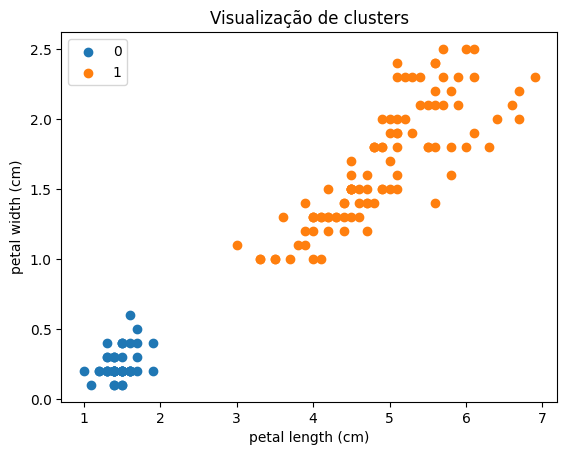

In [5]:
# Concatenação de dados e clusters
data['Cluster'] = dbscan.labels_

# Ordena os dados de acordo com o numero do cluster
data = data.sort_values(by = 'Cluster')

# Exibe cada cluster inidvidualmente para atribuir o titulo corretamente
for cluster in data['Cluster'].unique():
    k_data = data.loc[data['Cluster'] == cluster]
    plt.scatter(k_data.iloc[:, 0], k_data.iloc[:, 1], label = cluster)
    plt.legend()

plt.title('Visualização de clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

O grafico acima exibe os clusters que foram obtidos com o modelo, permitindo a analise das caracteristicas de cada um. 

Nesse caso o modelo encontrou 2 clusters. O cluster 0 e caracteriza por possuir petalas menores, tanto em comprimento quando em largura. O cluster 1 por sua vez é caracterizado por possuir petalas maiores, com largura maior que 1 e comprimento maior que. Os dados encontrados agora permitem utilizar essas caracteristicas para difernciar espécies de plantas que estejam dentro desses grupos.

#
[<- Anterior](k_means.ipynb) | [Próximo ->](../../Metricas/silhouette_score.ipynb)